In [1]:
# Code cell 1 : Import of packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium

In [2]:
# Code cell 2
# This should be a local path
dataset_path = './Map-Crime_Incidents-Previous_Three_Months.csv'

# Read the original dataset (in comma separated values format) into a DataFrame
SF = pd.read_csv(dataset_path)

In [3]:
# Code cell 3
!head -n 5 './Map-Crime_Incidents-Previous_Three_Months.csv'

In [4]:
# Code cell 4
pd.set_option('display.max_rows', 10) # Visualize 10 rows
SF

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location
0,NaN,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417393,37.790974,"(37.7909741243888, -122.417392830334)"
1,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404418,37.796302,"(37.7963018736036, -122.404417620748)"
2,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406959,37.789435,"(37.7894347630337, -122.406958660602)"
3,NaN,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,08/31/2014 07:00:00 AM +0000,17:49,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214965, -122.419671780296)"
4,NaN,DRUG/NARCOTIC,POSSESSION OF COCAINE,Sunday,08/31/2014 07:00:00 AM +0000,18:05,NORTHERN,"ARREST, BOOKED",LARKIN ST / OFARRELL ST,-122.417904,37.785167,"(37.7851670875814, -122.417903977564)"
...,...,...,...,...,...,...,...,...,...,...,...,...
30755,NaN,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Sunday,06/01/2014 07:00:00 AM +0000,15:30,SOUTHERN,"ARREST, BOOKED",900.0 Block of MARKET ST,-122.408052,37.783957,"(37.7839574642528, -122.408051765969)"
30756,NaN,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Sunday,06/01/2014 07:00:00 AM +0000,16:00,NORTHERN,"ARREST, CITED",POLK ST / MCALLISTER ST,-122.418601,37.780261,"(37.7802607511488, -122.418600974625)"
30757,NaN,ASSAULT,BATTERY,Sunday,06/01/2014 07:00:00 AM +0000,15:00,TENDERLOIN,"ARREST, CITED",0.0 Block of JONES ST,-122.412122,37.781379,"(37.7813786419025, -122.412121608136)"
30758,NaN,ASSAULT,ASSAULT WITH CAUSTIC CHEMICALS,Sunday,06/01/2014 07:00:00 AM +0000,15:20,CENTRAL,NONE,200.0 Block of GEARY ST,-122.407434,37.787494,"(37.7874944447786, -122.407434204569)"


In [5]:
# Code cell 5
SF.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location'],
      dtype='object')

In [6]:
# Code celle 6
len(SF)

30760

In [7]:
# Code cell 7
SF['Month'] = SF['Date'].apply(lambda row: int(row[0:2]))
SF['Day'] = SF['Date'].apply(lambda row: int(row[3:5]))

In [8]:
# Code cell 8
print(SF['Month'][0:2])
print(SF['Day'][0:2])

0    8
1    8
Name: Month, dtype: int64
0    31
1    31
Name: Day, dtype: int64


In [9]:
# Code cell 9
print(type(SF['Month'][0]))

<class 'numpy.int64'>


In [23]:
# Code cell 10
del SF['IncidntNum']

KeyError: 'IncidntNum'

In [10]:
# Code cell 11
SF.drop('Location', axis=1, inplace=True)

In [11]:
# Code cell 12
SF.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Month', 'Day'],
      dtype='object')

In [31]:
# Code cell 13
# print(SF['Category'])
CountCategory = SF['Category'].value_counts()
print(CountCategory)

LARCENY/THEFT              8205
OTHER OFFENSES             4004
NON-CRIMINAL               3653
ASSAULT                    2518
VEHICLE THEFT              1885
                           ... 
LOITERING                     5
BAD CHECKS                    3
BRIBERY                       1
GAMBLING                      1
PORNOGRAPHY/OBSCENE MAT       1
Name: Category, Length: 36, dtype: int64


In [13]:
# Code cell 14
SF['Category'].value_counts(ascending=True)

PORNOGRAPHY/OBSCENE MAT       1
GAMBLING                      1
BRIBERY                       1
BAD CHECKS                    3
LOITERING                     5
                           ... 
VEHICLE THEFT              1885
ASSAULT                    2518
NON-CRIMINAL               3653
OTHER OFFENSES             4004
LARCENY/THEFT              8205
Name: Category, Length: 36, dtype: int64

In [14]:
# Code cell 15
print(SF['Category'].value_counts(ascending=True))

PORNOGRAPHY/OBSCENE MAT       1
GAMBLING                      1
BRIBERY                       1
BAD CHECKS                    3
LOITERING                     5
                           ... 
VEHICLE THEFT              1885
ASSAULT                    2518
NON-CRIMINAL               3653
OTHER OFFENSES             4004
LARCENY/THEFT              8205
Name: Category, Length: 36, dtype: int64


In [15]:
# Code cell 16
# Possible code for the challenge question
print(SF['PdDistrict'].value_counts(ascending=True))

RICHMOND      1622
PARK          1800
TARAVAL       2038
TENDERLOIN    2449
INGLESIDE     2613
BAYVIEW       2970
NORTHERN      3205
CENTRAL       3867
MISSION       4011
SOUTHERN      6185
Name: PdDistrict, dtype: int64


In [16]:
# Code cell 17
AugustCrimes = SF[SF['Month'] == 8]
AugustCrimes

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Month,Day
0,NaN,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417393,37.790974,8,31
1,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404418,37.796302,8,31
2,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406959,37.789435,8,31
3,NaN,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,08/31/2014 07:00:00 AM +0000,17:49,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,-122.419672,37.765050,8,31
4,NaN,DRUG/NARCOTIC,POSSESSION OF COCAINE,Sunday,08/31/2014 07:00:00 AM +0000,18:05,NORTHERN,"ARREST, BOOKED",LARKIN ST / OFARRELL ST,-122.417904,37.785167,8,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9715,NaN,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Friday,08/01/2014 07:00:00 AM +0000,19:55,MISSION,NONE,1100.0 Block of POTRERO AV,-122.406497,37.754279,8,1
9716,NaN,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,Friday,08/01/2014 07:00:00 AM +0000,22:47,RICHMOND,NONE,1500.0 Block of BRODERICK ST,-122.441458,37.784427,8,1
9717,NaN,ASSAULT,THREATS AGAINST LIFE,Friday,08/01/2014 07:00:00 AM +0000,23:55,BAYVIEW,NONE,400.0 Block of TUNNEL AV,-122.401364,37.709748,8,1
9718,NaN,DRIVING UNDER THE INFLUENCE,DRIVING WHILE UNDER THE INFLUENCE OF ALCOHOL,Friday,08/01/2014 07:00:00 AM +0000,23:38,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,8,1


In [17]:
# Code cell 18
# Possible code for the question : How many burglaries were reported in the month of August ?
AugustCrimes = SF[SF['Month'] == 8]
AugustCrimesB = SF[SF['Category'] == 'BURGLARY']
len(AugustCrimesB)

1257

In [18]:
# To get the number of crimes in August
len(AugustCrimes)

9720

In [19]:
# Code cell 19
Crime0704 = SF.query('Month == 7 and Day == 4')
Crime0704

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Month,Day
19087,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,07/04/2014 07:00:00 AM +0000,22:30,SOUTHERN,NONE,8TH ST / MISSION ST,-122.413161,37.777457,7,4
19088,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,07/04/2014 07:00:00 AM +0000,18:15,SOUTHERN,NONE,CLEMENTINA ST / 9TH ST,-122.412174,37.774201,7,4
19089,NaN,BURGLARY,"BURGLARY,RESIDENCE UNDER CONSTRT, FORCIBLE ENTRY",Friday,07/04/2014 07:00:00 AM +0000,00:50,TARAVAL,NONE,0.0 Block of MENDOSA AV,-122.466414,37.748011,7,4
19090,NaN,NON-CRIMINAL,LOST PROPERTY,Friday,07/04/2014 07:00:00 AM +0000,19:00,PARK,NONE,CASTRO ST / 16TH ST,-122.435318,37.764102,7,4
19091,NaN,ASSAULT,BATTERY,Friday,07/04/2014 07:00:00 AM +0000,21:00,NORTHERN,NONE,1000.0 Block of POLK ST,-122.419783,37.785894,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19423,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,07/04/2014 07:00:00 AM +0000,19:25,SOUTHERN,NONE,THE EMBARCADEROSOUTH ST / BRYANT ST,-122.388007,37.787103,7,4
19424,NaN,OTHER OFFENSES,LOST/STOLEN LICENSE PLATE,Friday,07/04/2014 07:00:00 AM +0000,11:00,INGLESIDE,NONE,0.0 Block of FRATESSA CT,-122.399762,37.716129,7,4
19425,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,07/04/2014 07:00:00 AM +0000,20:30,SOUTHERN,NONE,THE EMBARCADEROSOUTH ST / HARRISON ST,-122.388486,37.789573,7,4
19426,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,07/04/2014 07:00:00 AM +0000,08:00,SOUTHERN,NONE,11TH ST / HARRISON ST,-122.412483,37.770631,7,4


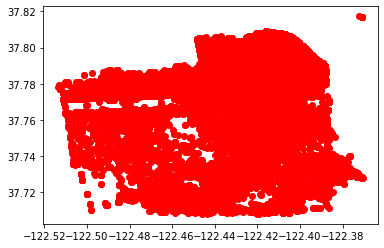

In [20]:
# Code cell 20
plt.plot(SF['X'], SF['Y'], 'ro')
plt.show()

In [21]:
# Code cell 21
pd_districts = np.unique(SF['PdDistrict'])
pd_districts_levels = dict(zip(pd_districts, range(len(pd_districts))))
pd_districts_levels

{'BAYVIEW': 0,
 'CENTRAL': 1,
 'INGLESIDE': 2,
 'MISSION': 3,
 'NORTHERN': 4,
 'PARK': 5,
 'RICHMOND': 6,
 'SOUTHERN': 7,
 'TARAVAL': 8,
 'TENDERLOIN': 9}

In [22]:
# Code cell 22
SF['PdDistrictCode'] = SF['PdDistrict'].apply(lambda row: pd_districts_levels[row])

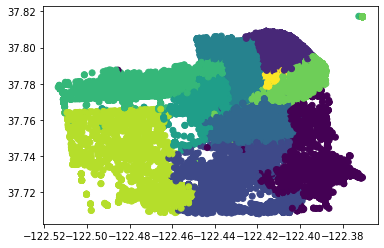

In [23]:
# Code cell 23
plt.scatter(SF['X'], SF['Y'], c=SF['PdDistrictCode'])
plt.show()

In [24]:
# Code cell 24
from matplotlib import colors
districts = np.unique(SF['PdDistrict'])
print(list(colors.cnames.values())[0 : len(districts)])

['#F0F8FF', '#FAEBD7', '#00FFFF', '#7FFFD4', '#F0FFFF', '#F5F5DC', '#FFE4C4', '#000000', '#FFEBCD', '#0000FF']


In [25]:
# Code cell 25
color_dict = dict(zip(districts, list(colors.cnames.values())[0:-1:len(districts)]))
color_dict

{'BAYVIEW': '#F0F8FF',
 'CENTRAL': '#8A2BE2',
 'INGLESIDE': '#00FFFF',
 'MISSION': '#FF8C00',
 'NORTHERN': '#FF1493',
 'PARK': '#F8F8FF',
 'RICHMOND': '#4B0082',
 'SOUTHERN': '#FAFAD2',
 'TARAVAL': '#B0C4DE',
 'TENDERLOIN': '#9370DB'}

In [26]:
# Code cell 26
# Create map
map_osm = folium.Map(location = [SF['Y'].mean(), SF['X'].mean()], zoom_start = 12)
plotEvery = 50
obs = list(zip(SF['Y'], SF['X'], SF['PdDistrict']))

for el in obs[0 : -1 : plotEvery]:
    folium.CircleMarker(el[0 : 2], color = color_dict[el[2]], fill_color = el[2], radius = 10).add_to(map_osm)

In [27]:
# Code cell 27
map_osm